### Import **Library**

In [8]:
# IMPORT LIBRARY
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

### Membaca **DATASET**

In [10]:
# MEMBACA DATASET REGRESI
datasetRegresi = pd.read_csv('dataset/R03_excercises.csv')
datasetRegresi

,Daily Exercise Time (X),Weight Loss (Y)
0,0.5,0.2
1,1.0,0.4
2,1.5,0.7
3,2.0,1.0
4,1.0,0.3
...,...,...
69,3.6,1.8
70,1.8,0.7
71,1.9,0.8
72,3.4,1.7


In [11]:
# MEMBACA DATASET KLASIFIKASI
datasetKlasifikasi = pd.read_csv('dataset/K04_bank_customers.csv', sep=';')
datasetKlasifikasi

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


### Melihat Info DATASET

In [12]:
# MELIHAT INFO DATASET REGRESI
datasetRegresi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Daily Exercise Time (X)  74 non-null     float64
 1   Weight Loss (Y)          74 non-null     float64
dtypes: float64(2)
memory usage: 1.3 KB


In [13]:
# MELIHAT INFO DATASET KLASIFIKASI
datasetKlasifikasi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


### Meringkas Statistik DATASET

In [14]:
# MELIHAT RINGKASAN STATISTIK DATASET REAGRESI
datasetRegresi.describe()

,Daily Exercise Time (X),Weight Loss (Y)
count,74.000000,74.000000
mean,2.124324,1.001351
std,1.021121,0.567980
min,0.400000,0.200000
25%,1.225000,0.500000
50%,2.050000,1.000000
75%,2.975000,1.500000
max,3.900000,2.000000


In [15]:
# MELIHAT RINGKASAN STATISTIK DATASET KLASIFIKASI
datasetKlasifikasi.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### Cek Data Kosong

In [16]:
# CEK DATA KOSONG DATASET REAGRESI
datasetRegresi.isna().sum()

,0
Daily Exercise Time (X),0
Weight Loss (Y),0


In [17]:
# CEK DATA KOSONG DATASET KLASIFIKASI
datasetKlasifikasi.isna().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


### DECISION TREE CLASSIFIER

In [18]:
# MEMBAGI DATA MENJADI ATRIBUT DAN TARGET DATASET REGRESI
xRegresi = np.asarray(datasetRegresi.drop(['Weight Loss (Y)'], axis=1), dtype=np.float64)
yRegresi = np.asarray(datasetRegresi['Weight Loss (Y)'], dtype=int)

In [19]:
# MEMBAGI DATA MENJADI ATRIBUT DAN TARGET DATASET KLASIFIKASI
xKlasifikasi = datasetKlasifikasi.drop(['y'], axis=1)
yKlasifikasi = datasetKlasifikasi['y']

# MENGUBA DATA KATEGORIAL MENAJADI NUMERIK DENGAN ONE-HOT ENCODING
x_encoded = pd.get_dummies(xKlasifikasi)

# MENGONVERSI TARGE MENJADI NUMERIK (yes/no menjadi 1/0)
y_encoded = yKlasifikasi.map({'yes': 1, 'no': 0})

### MEMBAGI DATASET MENJADI DATA LATHIN DAN UJI

In [20]:
# MEMBAGI DATASET MENJADI DATA LATIH DAN DATA UJI DATASET REGRESI
x_train, x_test, y_train, y_test = train_test_split(xRegresi, yRegresi, test_size=0.3, random_state=0)

In [21]:
#MEMBAGI DATASET MENJADI DATA LATIH DAN DATA UJI DATASET KLASIFIKASI
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_encoded, y_encoded, test_size=0.3, random_state=0)

### MEMBUAT MODEL

In [22]:
# MEMBUAT MODEL DATASET REGRESI
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [23]:
# MEMBUAT MODEL DATASET KLASIFIKASI
model2 = DecisionTreeClassifier()
model2.fit(x_train2, y_train2)

DecisionTreeClassifier()

### VISUALISASI MODEL DECISION TREE

<function matplotlib.pyplot.show(close=None, block=None)>

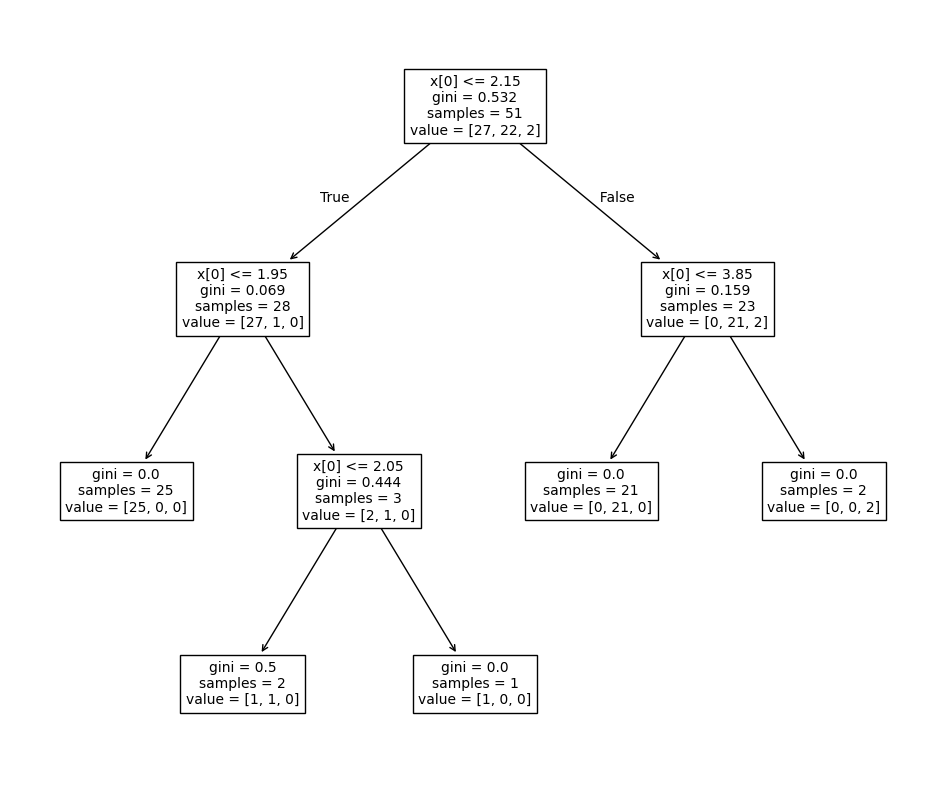

In [24]:
# VISUALISASI MODEL DECISION TREE DATASET REGRESI
plt.subplots(figsize = (12,10))
tree.plot_tree(model, fontsize = 10)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

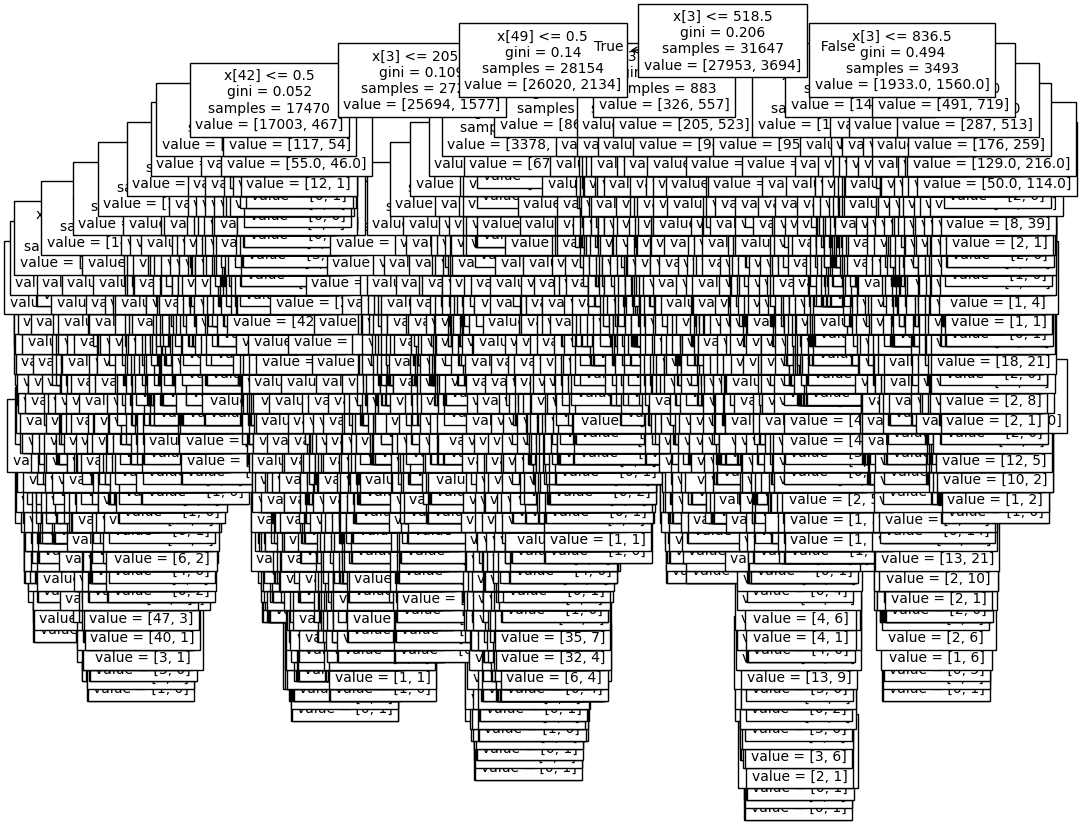

In [96]:
# VISUALISASI MODEL DECISION TREE DATASET KLASIFIKASI
import matplotlib.pyplot as plt
from sklearn import tree

plt.subplots(figsize = (12,10))
tree.plot_tree(model2, fontsize = 10)
plt.show

In [25]:
#EVALUASI MODEL DATASET REGRESI
y_pred = model.predict(x_test)
accuracy_score(y_test, y_pred)

0.9565217391304348

In [26]:
print(classification_report(y_test, y_pred))
print(x_test[:5])
print(y_pred[:5])
print(y_test[:5])

              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.93      0.96        14

    accuracy                           0.96        23
   macro avg       0.95      0.96      0.96        23
weighted avg       0.96      0.96      0.96        23

[[3.2]
 [2. ]
 [3.7]
 [3.6]
 [1. ]]
[1 0 1 1 0]
[1 0 1 1 0]


In [27]:
#EVALUASI MODEL DATASET KLASIFIKASI
y_pred2 = model2.predict(x_test2)
accuracy_score(y_test2, y_pred2)

0.8731200235918608

In [28]:
print(classification_report(y_test2, y_pred2))
print(x_test2[:5])
print(y_pred2[:5])
print(y_test2[:5])

              precision    recall  f1-score   support

           0       0.93      0.92      0.93     11969
           1       0.46      0.50      0.48      1595

    accuracy                           0.87     13564
   macro avg       0.70      0.71      0.70     13564
weighted avg       0.88      0.87      0.88     13564

       age  balance  day  duration  campaign  pdays  previous  job_admin.  \
14001   37     1403   10        91        15     -1         0       False   
32046   36     -253   14      1073         1     -1         0       False   
13318   47     -406    8       243         5     -1         0       False   
42991   57      501   11       105         7    188         2       False   
14237   33     -406   14       332         2     -1         0       False   

       job_blue-collar  job_entrepreneur  ...  month_jun  month_mar  \
14001            False             False  ...      False      False   
32046            False             False  ...      False      False 

In [30]:
# MENGUJI DENGAN DATA BARU DATASET REGRESI
iris_batch = np.array([[7.0], [2.5], [3.6], [8.1]])
print(model.predict(iris_batch))

[2 1 1 2]


In [32]:
# MENGUJI DENGAN DATA BARU DATASET KLASIFIKASI
iris_batch2 = np.array([
    [0] * 51,
    [1] * 51
])

prediksi_baru = model2.predict(iris_batch2)
print(prediksi_baru)

[0 1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
